## Visualizing gender gap in bachelor degrees in the USA

Main goal of that project is to create a visualization to **how the gender gap has changed in bachelor degrees in the US**.

To answer that question the original dataset was chosen that is issued annually by [The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp). 
It contains the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category. 
Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. I used the latest version of the dataset that Randal [compiled](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

## Getting to know the data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           42 non-null     int64  
 1   Agriculture                    42 non-null     float64
 2   Architecture                   42 non-null     float64
 3   Art and Performance            42 non-null     float64
 4   Biology                        42 non-null     float64
 5   Business                       42 non-null     float64
 6   Communications and Journalism  42 non-null     float64
 7   Computer Science               42 non-null     float64
 8   Education                      42 non-null     float64
 9   Engineering                    42 non-null     float64
 10  English                        42 non-null     float64
 11  Foreign Languages              42 non-null     float64
 12  Health Professions             42 non-null     float

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [3]:
women_degrees['Year'].describe()

count      42.000000
mean     1990.500000
std        12.267844
min      1970.000000
25%      1980.250000
50%      1990.500000
75%      2000.750000
max      2011.000000
Name: Year, dtype: float64

The dataset contains information about the share of female students in 16 bachelor degrees for years 1970-2011.
Below I will try to show with the help of this dataset, how a gender gap changed in the course of that time span.
I have divided degrees in 3 categories:
 - STEM
 - liberal arts
 - other degrees

At first I will generate **only plots for 6 degrees in the STEM category** to test how the visualization tools work.

In [4]:
# set colors of lines in the plots 
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# group basic categories of bachelor degrees
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

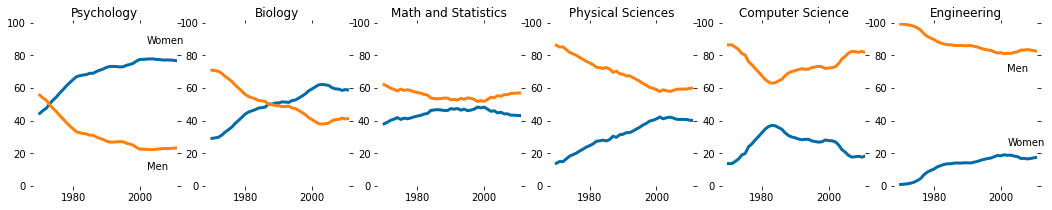

In [5]:
fig = plt.figure(figsize= (18, 3))

# loop to create serie of plots and put them in the grid
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[sp]], c=cb_orange, linewidth=3, label='Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom='off',top='off',left='off',right='off')
    
    # set spines invisible
    for key,spine in ax.spines.items():
        ax.spines[key].set_visible(False)
        
    # add labels to leftmost and rightmost plots
    if sp==0:
        ax.text(2002, 87, 'Women')
        ax.text(2002, 10, 'Men')
    elif sp==5:
        ax.text(2002, 70, 'Men')
        ax.text(2002, 25, 'Women')

## Small multiple

My next step will be creation of **small multiple**: a series of small-sized plots indexed by category or a label, sequenced over time. Small multiples can show rich, multi-dimensional data without trying to cram all that information into a single, overly-complex chart. 

I will create a grid with 3 columns and put in every column plots showing proportion of male and female students for every category of bachelors.

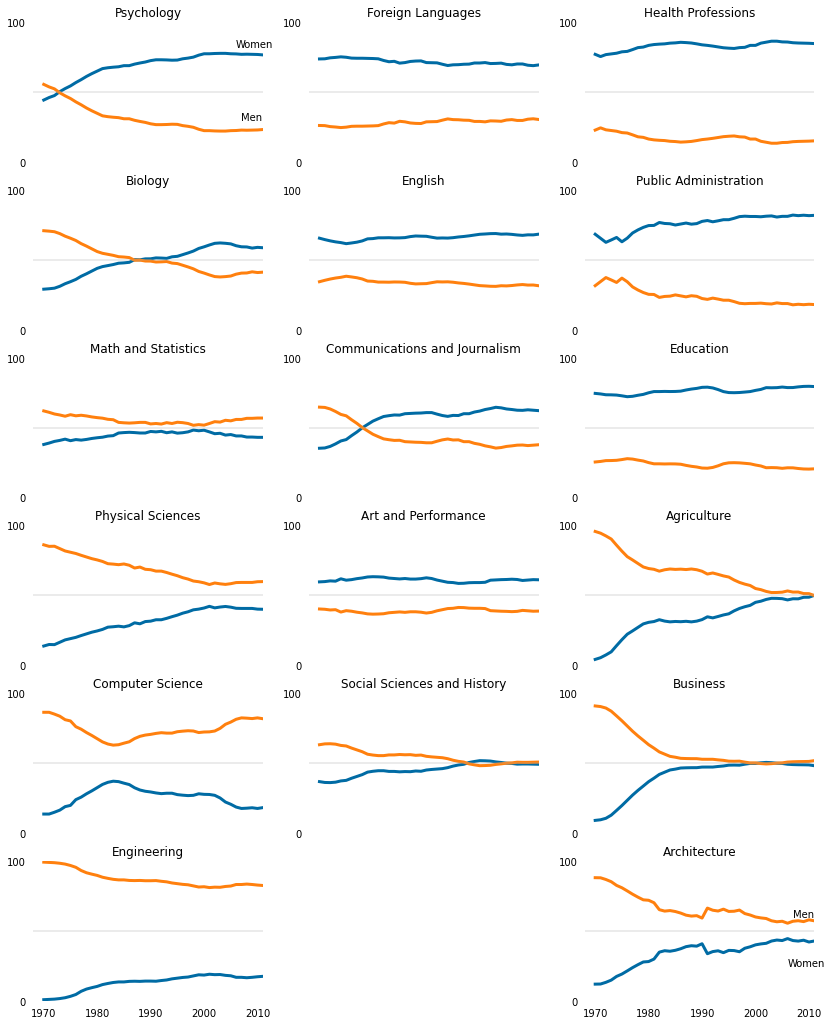

In [6]:
fig = plt.figure(figsize=(14, 18))

index_stem = 0
index_lib = 0
index_other = 0

# loop to create series of plots for each category and put them in the grid
for sp in range(0, 18):

    ax = fig.add_subplot(6,3,sp+1)
    
    # sort the category
    if sp%3==0:
        curr_cat = stem_cats
        index = index_stem
    elif sp%3==1:
        curr_cat = lib_arts_cats
        index = index_lib
        if index_lib == 5:
            ax.remove()
            continue
    else:
        curr_cat = other_cats
        index = index_other
    
    # create plots
    ax.plot(women_degrees['Year'], women_degrees[curr_cat[index]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100 - women_degrees[curr_cat[index]], c=cb_orange, linewidth=3, label='Men')
    ax.set_title(curr_cat[index])
    ax.tick_params(bottom=False,top=False,left=False,right=False,labelbottom=False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_yticks([0, 100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    # set annotations for topmost and bottommost plots
    if index == 0 and sp == 0:
        ax.text(2007, 30, 'Men')
        ax.text(2006, 82, 'Women')
        
    elif index == 5 and sp == 17:
        ax.text(2007, 60, 'Men')
        ax.text(2006, 25, 'Women')
    if index == 5:
        ax.tick_params(labelbottom='on')
        
    # increment indexes
    if sp%3==0:
        index_stem+=1
    elif sp%3==1:
        index_lib+=1
    else:
        index_other+=1
    
    # set spines invisible
    for key,spine in ax.spines.items():
        ax.spines[key].set_visible(False)

Now I will export small multiples to *png* format and it can be further used for presentations or other research projects.

In [7]:
fig.savefig("gender_degrees.png")

## Observations

In course of 42 years the gender gap in some fields has changed:
 - Degrees in Psychology, Biology and Communications&Journalism became predominantly ‘female’
 - In Agriculture, Business  as well as Social Sciences & History degrees the gender gap was nearly eliminated by increased proportion of female students
 - In Math & Statistics, Physical Sciences and Architecture the long-term trend was to increase the proportion of female students with recent trend starting from mid 00s to increased male proportion

In some fields though the ratio of female and male students didn’t change in a significant way:
 - Degrees in  Foreign Languages, English, Art&Performance in Liberal Arts category, as well Health Professions and Education were and still are dominated by female students. 
 - Degrees in Engineering and Computer Science are still dominated by male students (with short trend to decreased gap in early 80th in Computer Science)

# Conclusion
In some fields the gender gap was significantly decreased or even eliminated (e.g. in business degrees).
Despite the significant change in gender proportions between female and male students in the course of the last 42 years in certain fields it is still a continuing trend, that STEM degrees attract more male students while Humanities and Liberal Arts degrees remain 'female'. 